## VGG16 Classes

Example image taken from ISIC-dataset, code from: https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

In [4]:
from keras import applications
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from IPython.display import Image, display, clear_output
import os
os.chdir("/home/dwx/Documents/Studium/DTU/11/DL Deep Learning/project/ISIC_MSK-2_1_sorted")

train_data_dir = 'train'
validation_data_dir = 'validation'
test_dir = 'test'

files_benign=os.listdir(test_dir+"/Benign/")
files_malignant=os.listdir(test_dir+"/Malignant/")

filename = "cat_0_286.jpeg"

model = applications.VGG16()
image = load_img(filename, target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)[0]

for (a,b,c) in label:
    print('%s (%.2f%%)' % (b, c*100))

geyser (67.35%)
borzoi (1.68%)
missile (1.19%)
fountain (0.85%)
Brittany_spaniel (0.74%)


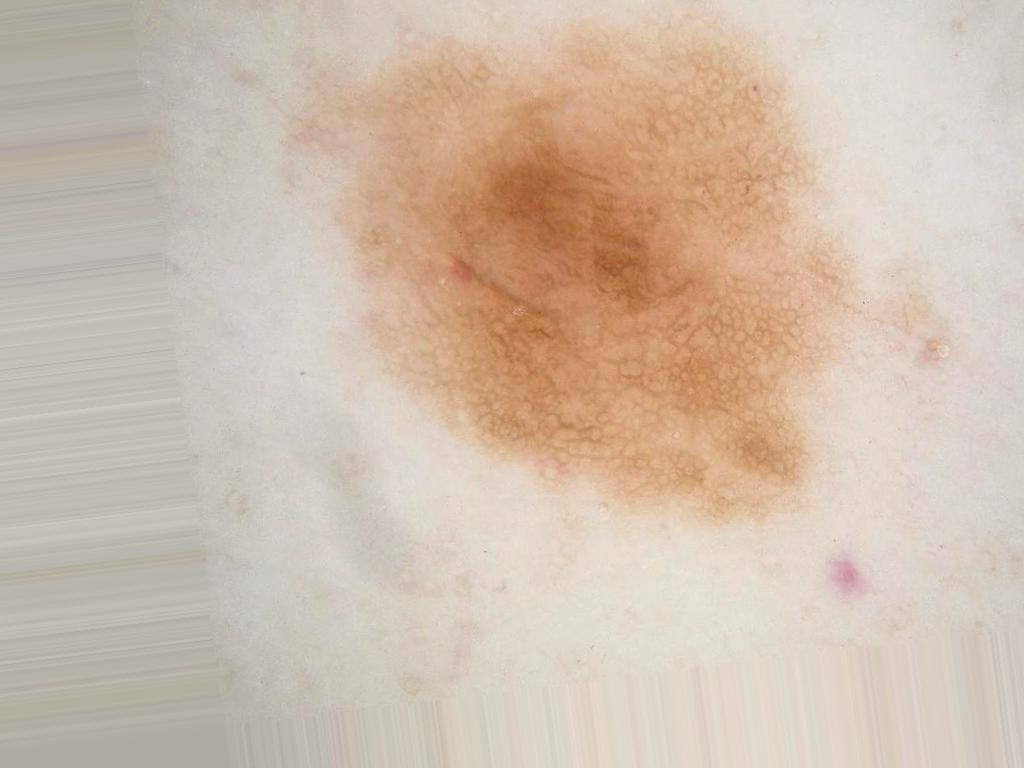

In [5]:
display(Image(filename))